In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing the relevant libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LinearRegression

# **Loading the raw data**

In [5]:
raw_data = pd.read_csv('/content/sample_data/CarPrice_Assignment.csv')
raw_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **Exploring and Preprocessing**

**Exploring the descriptive statistics of the variable**

In [6]:
# Continuous variables
numeric_data = raw_data.select_dtypes(include=['int64', 'float64'])
# Categorical variables
categorical_data = raw_data.select_dtypes(include=['object'])

In [7]:
numeric_data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
numeric_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
categorical_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [10]:
categorical_data.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [11]:
raw_data = raw_data.drop(['CarName'], axis=1)

**Dealing with missing values**

In [12]:
raw_data.isnull().sum()

,0
car_ID,0
symboling,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0


In [13]:
data = raw_data.dropna(axis=0)

**Exploring PDFs**

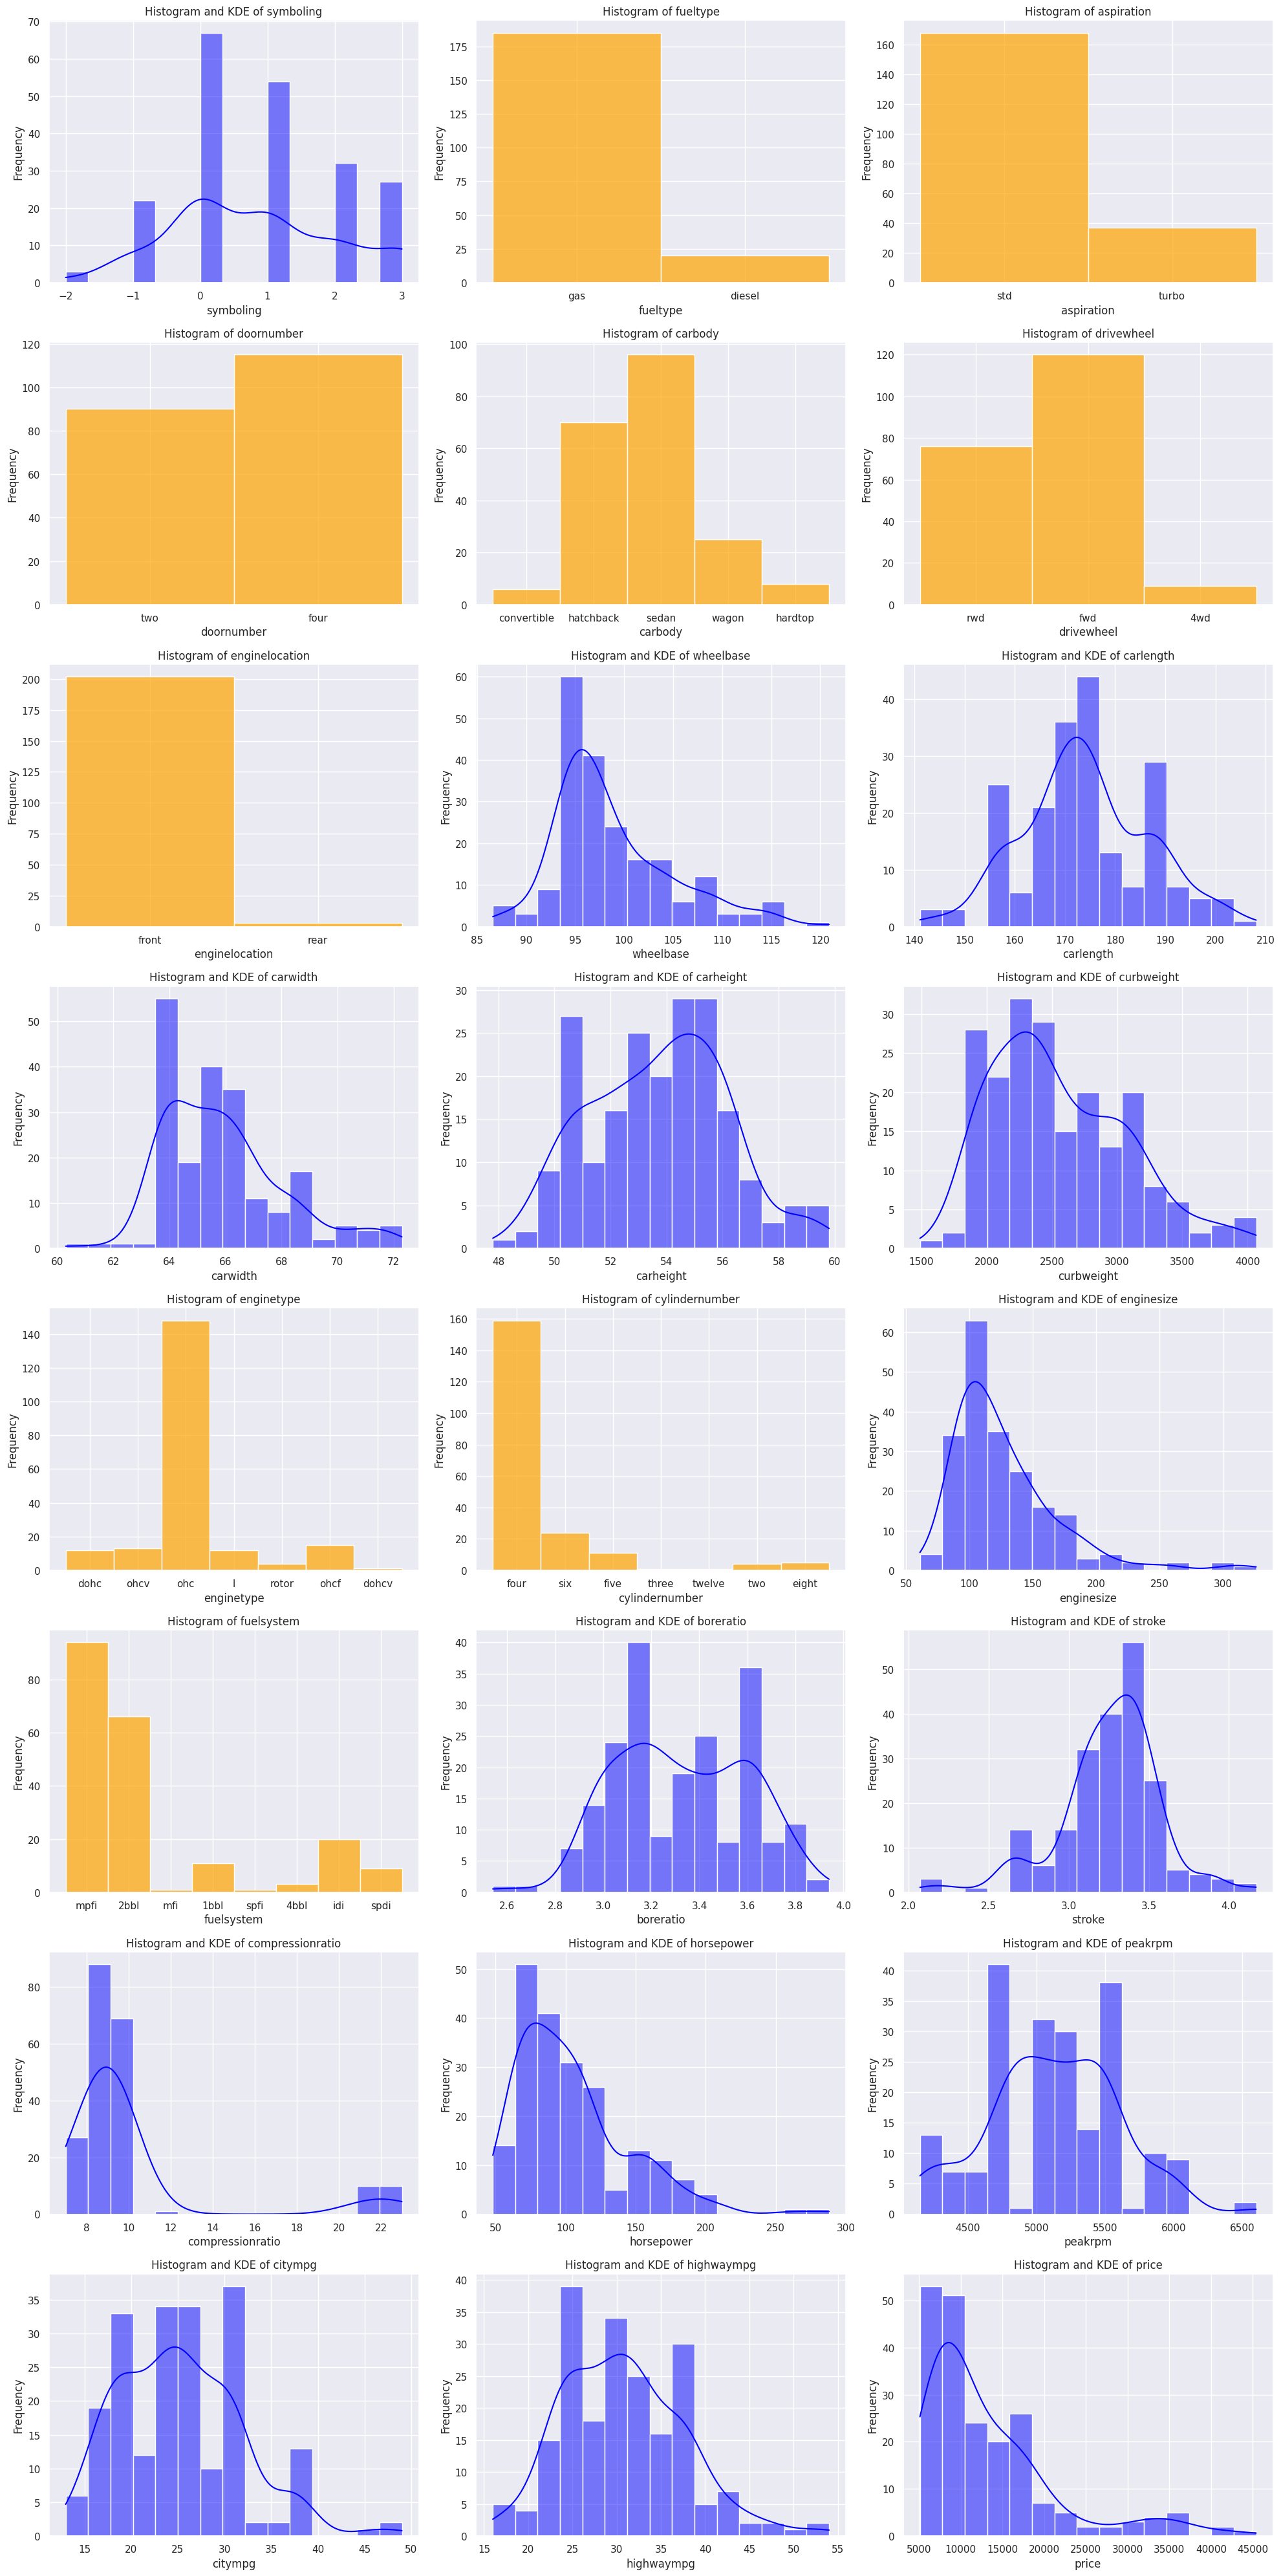

In [14]:
# List of variables
columns_to_plot = [
    'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
    'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
    'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
    'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
    'citympg', 'highwaympg', 'price'
]

# Define the number of rows and columns for the subplots
cols = 3  # Number of columns per row
rows = (len(columns_to_plot) // cols) + (len(columns_to_plot) % cols > 0)  # Number of rows

# Set the figure size and create subplots
plt.figure(figsize=(20, rows * 5))  # Adjust figure size

# Loop through each variable to plot histograms
for i, column in enumerate(columns_to_plot):
    plt.subplot(rows, cols, i + 1)  # Create a subplot for each variable

    if raw_data[column].dtype in ['int64', 'float64']:  # For continuous variables
        # Plot histogram with KDE (Kernel Density Estimate)
        sns.histplot(raw_data[column].dropna(), kde=True, bins=15, color='blue', alpha=0.5)
        plt.title(f"Histogram and KDE of {column}")  # Add title
        plt.xlabel(column)  # X-axis label
        plt.ylabel("Frequency")  # Y-axis label
    else:  # For categorical variables
        # Plot histogram for discrete/categorical variables
        sns.histplot(data=raw_data, x=column, discrete=True, color='orange', alpha=0.7)
        plt.title(f"Histogram of {column}")  # Add title
        plt.xlabel(column)  # X-axis label
        plt.ylabel("Frequency")  # Y-axis label

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# **Dealing with outliers**

In [15]:
q = data['price'].quantile(0.99)
data_1 = data[data['price'] < q]

q1 = data_1['horsepower'].quantile(0.99)
data_2 = data_1[data_1['horsepower'] < q1]

q2 = data_2['enginesize'].quantile(0.99)
data_3 = data_2[data_2['enginesize'] < q2]

q3 = data_3['wheelbase'].quantile(0.99)
data_4 = data_3[data_3['wheelbase'] < q3]

q4 = data_4['citympg'].quantile(0.99)
data_5 = data_4[data_4['citympg'] < q4]

In [16]:
data_no_outliers = data_5

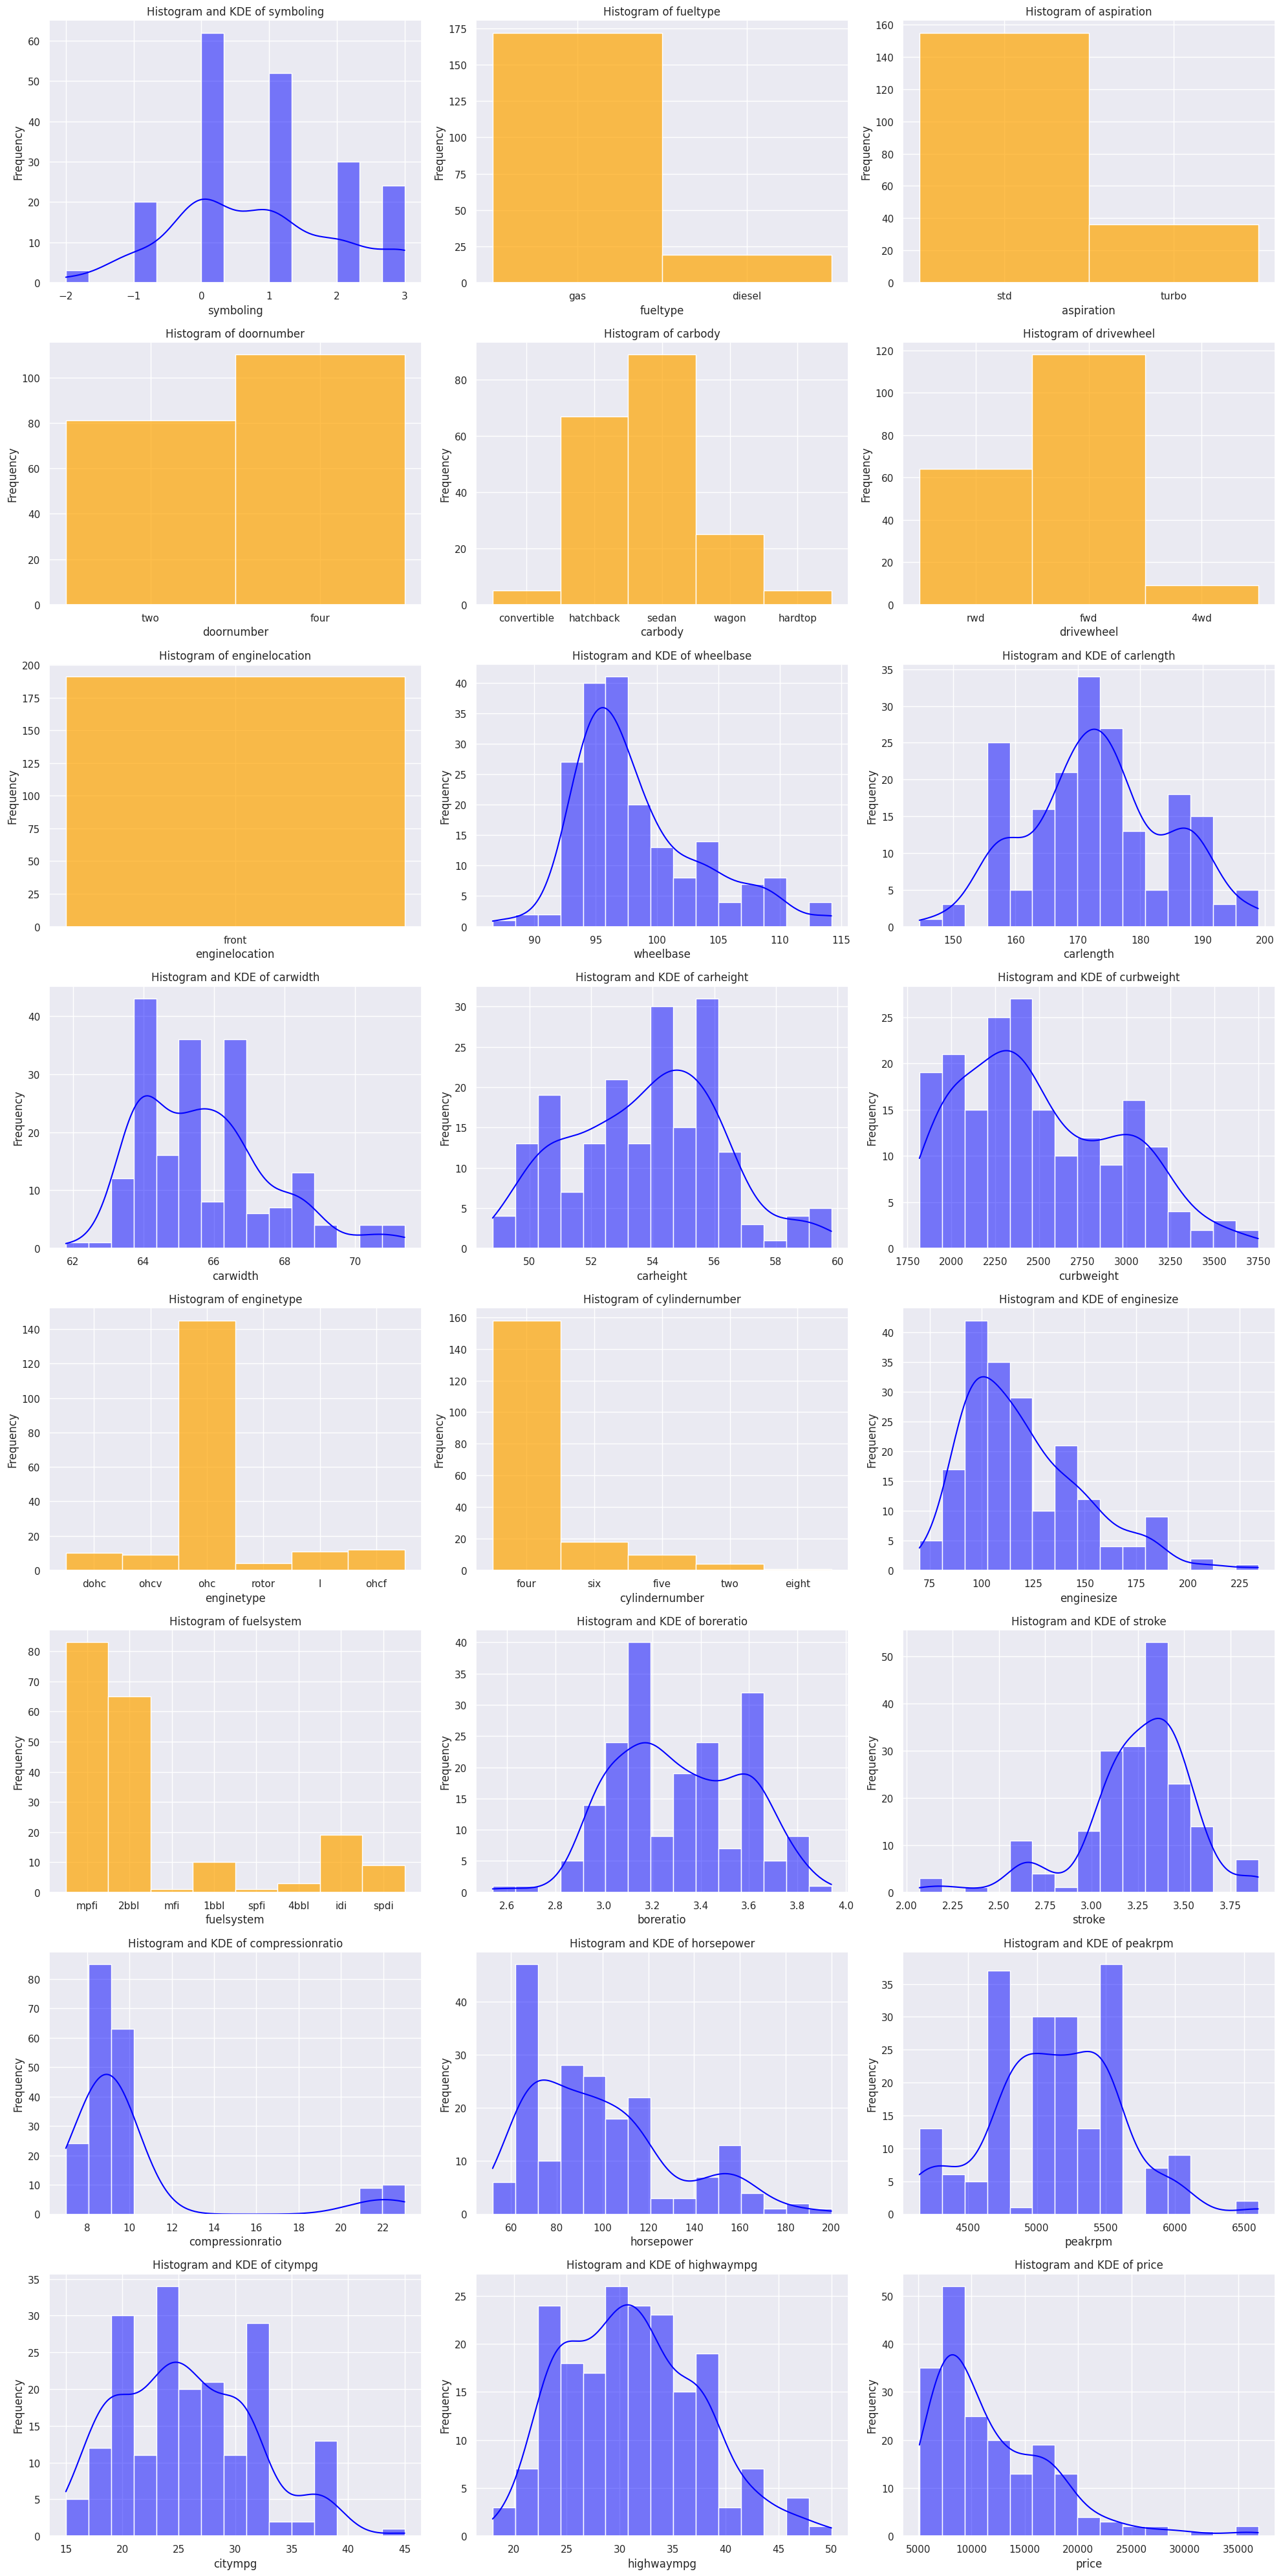

In [17]:
# List of variables
columns_to_plot = [
    'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
    'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
    'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
    'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
    'citympg', 'highwaympg', 'price'
]

# Define the number of rows and columns for the subplots
cols = 3  # Number of columns per row
rows = (len(columns_to_plot) // cols) + (len(columns_to_plot) % cols > 0)  # Number of rows

# Set the figure size and create subplots
plt.figure(figsize=(20, rows * 5))  # Adjust figure size

# Loop through each variable to plot histograms
for i, column in enumerate(columns_to_plot):
    plt.subplot(rows, cols, i + 1)  # Create a subplot for each variable

    if data_no_outliers[column].dtype in ['int64', 'float64']:  # For continuous variables
        # Plot histogram with KDE (Kernel Density Estimate)
        sns.histplot(data_no_outliers[column].dropna(), kde=True, bins=15, color='blue', alpha=0.5)
        plt.title(f"Histogram and KDE of {column}")  # Add title
        plt.xlabel(column)  # X-axis label
        plt.ylabel("Frequency")  # Y-axis label
    else:  # For categorical variables
        # Plot histogram for discrete/categorical variables
        sns.histplot(data=data_5, x=column, discrete=True, color='orange', alpha=0.7)
        plt.title(f"Histogram of {column}")  # Add title
        plt.xlabel(column)  # X-axis label
        plt.ylabel("Frequency")  # Y-axis label

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# **Checking The OLS Assumptions**

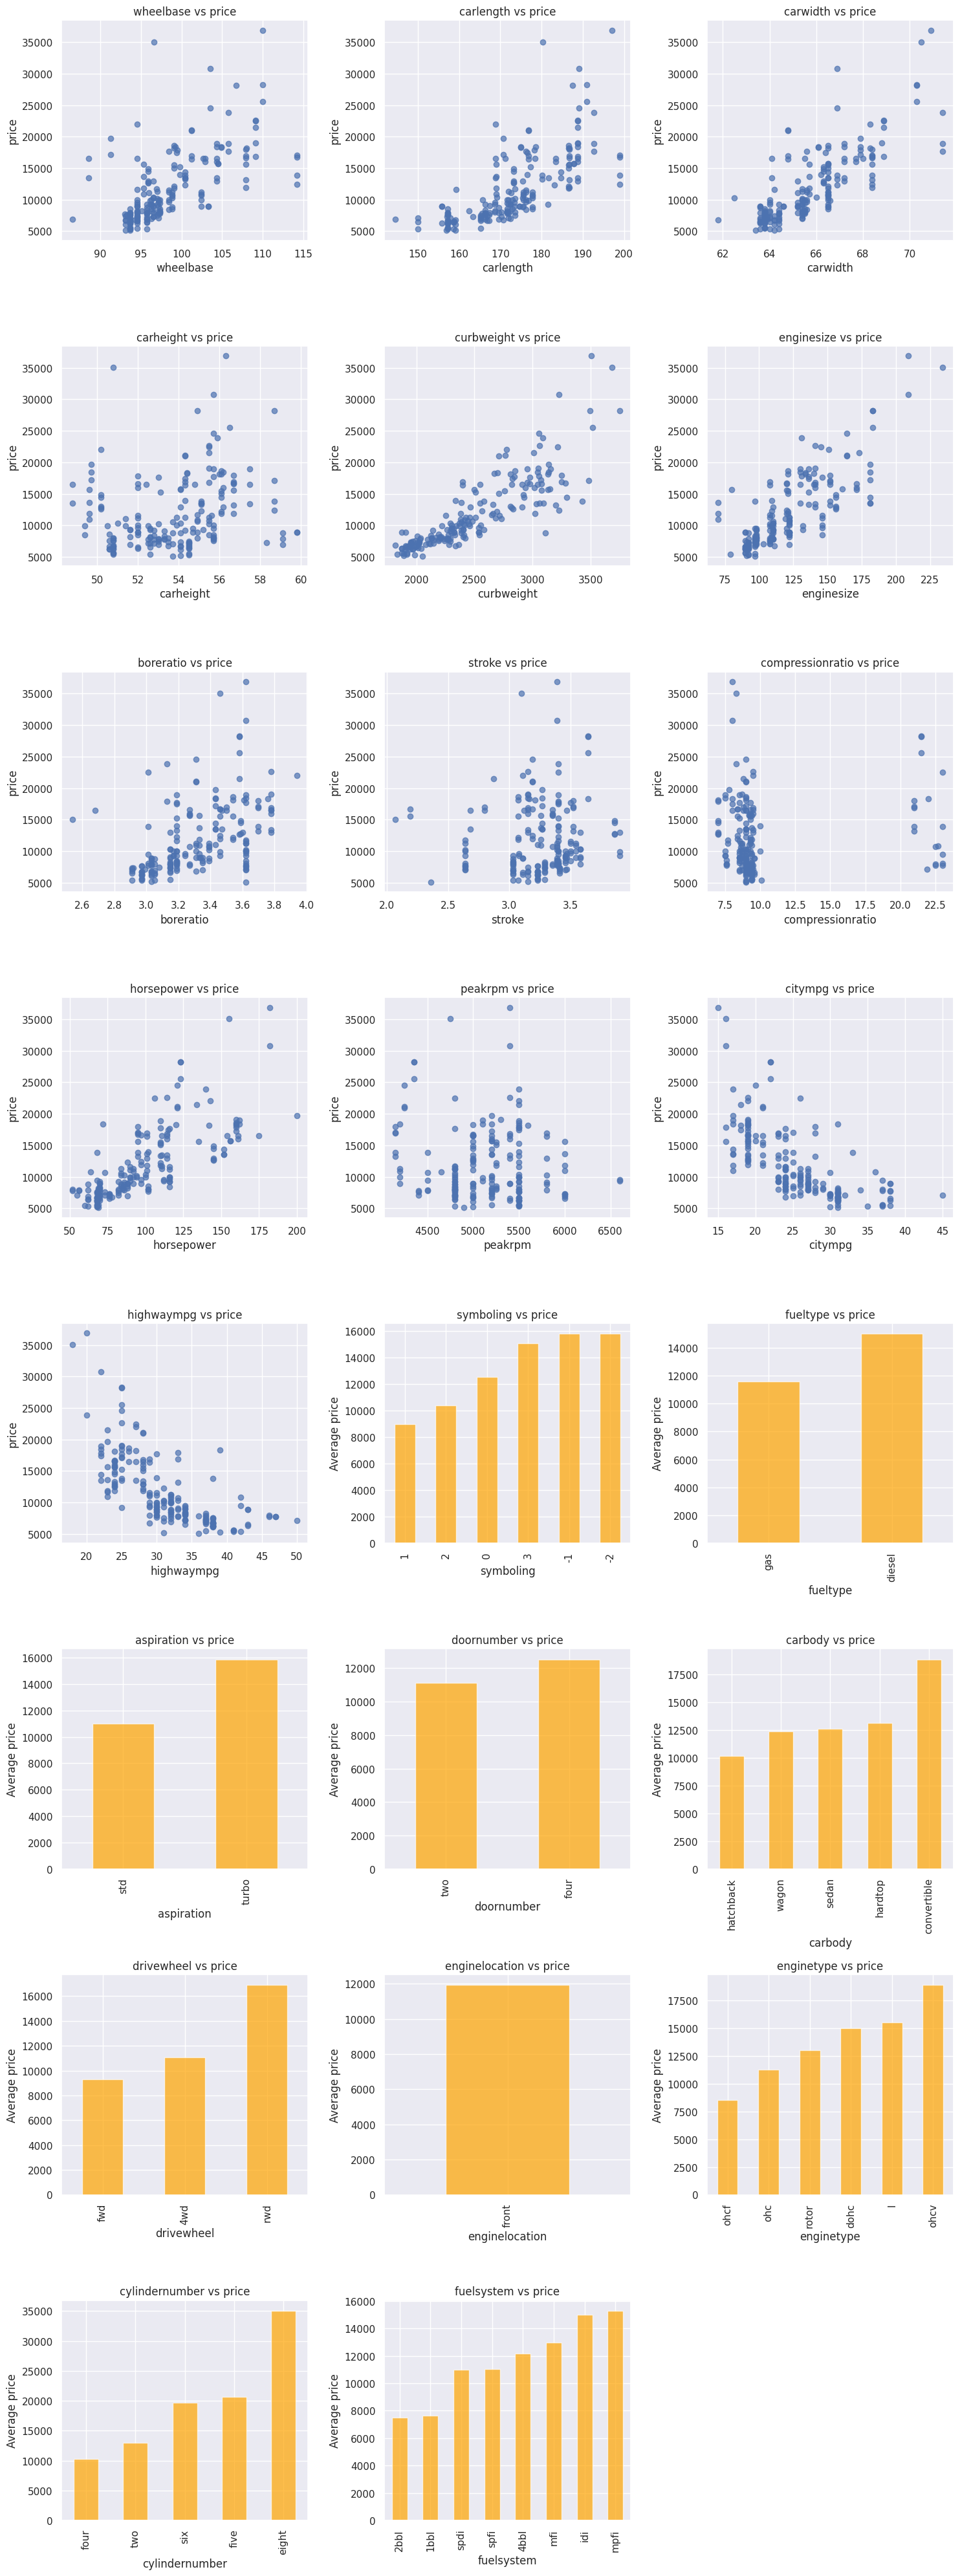

In [18]:
# Continuous and categorical variables
continuous_vars = [
    'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
    'enginesize', 'boreratio', 'stroke', 'compressionratio',
    'horsepower', 'peakrpm', 'citympg', 'highwaympg'
]
categorical_vars = [
    'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'
]
target_var = 'price'

# Combine all variables for plotting
all_vars = continuous_vars + categorical_vars

# Define the number of rows and columns for subplots
cols = 3  # Number of columns per row
rows = (len(all_vars) // cols) + (len(all_vars) % cols > 0)  # Total number of rows

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey=False)  # Sharey only for scatter plots if needed

# Loop through all variables
for i, column in enumerate(all_vars):
    row, col = divmod(i, cols)  # Determine row and column index for the subplot
    ax = axes[row, col] if rows > 1 else axes[col]  # Select the specific subplot

    if column in continuous_vars:  # If the column is continuous
        # Create scatter plot for continuous variables
        ax.scatter(data_no_outliers[column], data_no_outliers[target_var], alpha=0.7)
        ax.set_title(f"{column} vs {target_var}")
        ax.set_xlabel(column)
        ax.set_ylabel(target_var)
    elif column in categorical_vars:  # If the column is categorical
        # Create bar plot for categorical variables
        category_means = data_no_outliers.groupby(column)[target_var].mean().sort_values()  # Sort values ascending
        category_means.plot(kind='bar', ax=ax, color='orange', alpha=0.7)
        ax.set_title(f"{column} vs {target_var}")
        ax.set_xlabel(column)
        ax.set_ylabel(f"Average {target_var}")

# Remove empty subplot areas
for i in range(len(all_vars), rows * cols):
    row, col = divmod(i, cols)
    fig.delaxes(axes[row, col] if rows > 1 else axes[col])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [19]:
# Calculate the correlation matrix
correlation_matrix = data_no_outliers[continuous_vars + [target_var]].corr()

# Extract correlations with the target variable 'price'
correlation_with_price = correlation_matrix[target_var].drop(target_var)  # Exclude self-correlation

# Print correlation values
print("Correlation of continuous variables with 'price':")
print(correlation_with_price)

# Define a threshold for low correlation (e.g., absolute correlation < 0.1)
low_corr_vars = correlation_with_price[correlation_with_price.abs() < 0.1].index.tolist()

# Print variables with low correlation
print(f"Variables with low correlation to 'price': {low_corr_vars}")

# Drop low-correlation variables from the dataset
data_no_outliers = data_no_outliers.drop(columns=low_corr_vars)

# Display the updated dataset
print("Updated dataset after removing low-correlation variables:")
print(data_no_outliers.head())

Correlation of continuous variables with 'price':
wheelbase           0.625614
carlength           0.708602
carwidth            0.790331
carheight           0.225556
curbweight          0.847341
enginesize          0.795200
boreratio           0.482127
stroke              0.075179
compressionratio    0.127083
horsepower          0.744602
peakrpm            -0.115613
citympg            -0.680416
highwaympg         -0.698320
Name: price, dtype: float64
Variables with low correlation to 'price': ['stroke']
Updated dataset after removing low-correlation variables:
   car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        s

In [20]:
data_preprocessed = data_no_outliers
log_price = np.log(data_no_outliers['price'])
data_preprocessed['log_price'] = log_price
data_preprocessed.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,log_price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,9.0,111,5000,21,27,13495.0,9.510075
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,9.0,111,5000,21,27,16500.0,9.711116
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,9.0,154,5000,19,26,16500.0,9.711116
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,10.0,102,5500,24,30,13950.0,9.543235
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,8.0,115,5500,18,22,17450.0,9.767095


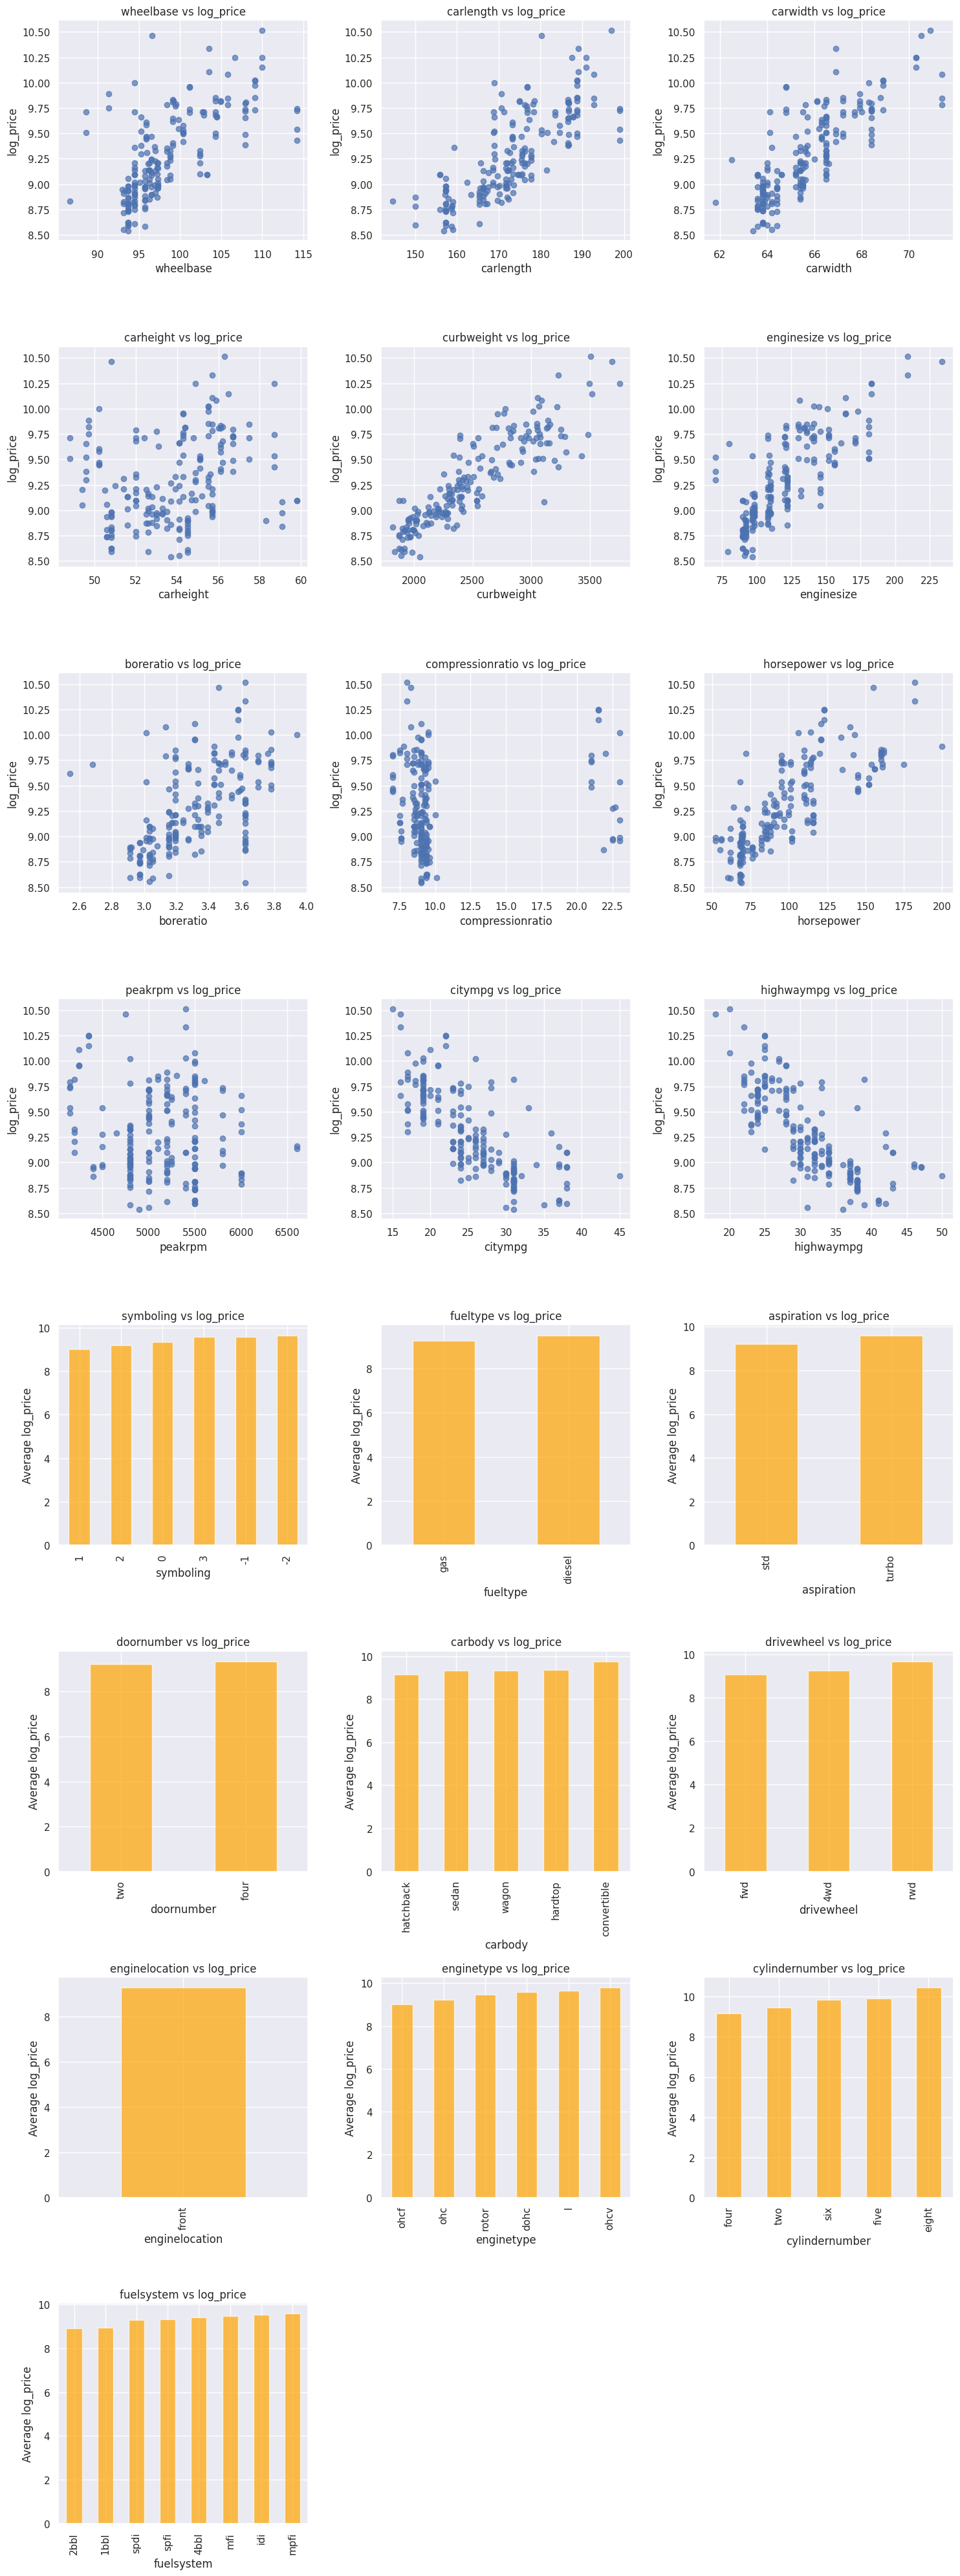

In [21]:
# Continuous and categorical variables
continuous_vars = [
    'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
    'enginesize', 'boreratio', 'compressionratio',
    'horsepower', 'peakrpm', 'citympg', 'highwaympg'
]
categorical_vars = [
    'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'
]
target_var = 'log_price'  # Updated target variable

# Combine all variables for plotting
all_vars = continuous_vars + categorical_vars

# Define the number of rows and columns for subplots
cols = 3  # Number of columns per row
rows = (len(all_vars) // cols) + (len(all_vars) % cols > 0)  # Total number of rows

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), sharey=False)  # Sharey only for scatter plots if needed

# Loop through all variables
for i, column in enumerate(all_vars):
    row, col = divmod(i, cols)  # Determine row and column index for the subplot
    ax = axes[row, col] if rows > 1 else axes[col]  # Select the specific subplot

    if column in continuous_vars:  # If the column is continuous
        # Create scatter plot for continuous variables
        ax.scatter(data_preprocessed[column], data_preprocessed[target_var], alpha=0.7)
        ax.set_title(f"{column} vs {target_var}")
        ax.set_xlabel(column)
        ax.set_ylabel(target_var)
    elif column in categorical_vars:  # If the column is categorical
        # Create bar plot for categorical variables
        category_means = data_preprocessed.groupby(column)[target_var].mean().sort_values()  # Sort values ascending
        category_means.plot(kind='bar', ax=ax, color='orange', alpha=0.7)
        ax.set_title(f"{column} vs {target_var}")
        ax.set_xlabel(column)
        ax.set_ylabel(f"Average {target_var}")

# Remove empty subplot areas
for i in range(len(all_vars), rows * cols):
    row, col = divmod(i, cols)
    fig.delaxes(axes[row, col] if rows > 1 else axes[col])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


# **Multicollinearity??**

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_cleaned = data_preprocessed.drop(['price'], axis=1)
variables = data_cleaned[continuous_vars]


vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,2037.946821,wheelbase
1,1858.962158,carlength
2,2296.808401,carwidth
3,982.230570,carheight
4,451.426379,curbweight
5,103.731088,enginesize
6,286.209691,boreratio
7,18.819514,compressionratio
8,74.473430,horsepower
9,224.905922,peakrpm


In [23]:
# Iteratively remove variables with high VIF
while True:
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
    vif['Features'] = variables.columns

    # Find the feature with the highest VIF
    max_vif = vif['VIF'].max()
    if max_vif > 10:  # Define your threshold
        max_vif_feature = vif.loc[vif['VIF'] == max_vif, 'Features'].values[0]
        print(f"Removing: {max_vif_feature} with VIF: {max_vif}")
        variables = variables.drop(columns=[max_vif_feature])
    else:
        break
vif

Removing: carwidth with VIF: 2296.8084010141706
Removing: wheelbase with VIF: 1802.4341128752133
Removing: carlength with VIF: 1271.1298076826595
Removing: carheight with VIF: 550.8110069342189
Removing: highwaympg with VIF: 456.7314835695513
Removing: curbweight with VIF: 213.1761748665425
Removing: boreratio with VIF: 133.1145492539185
Removing: peakrpm with VIF: 84.74365780659033
Removing: enginesize with VIF: 54.7625161729615


,VIF,Features
0,8.714340,compressionratio
1,4.480755,horsepower
2,9.556968,citympg


# **Create Dummy Variables**

In [24]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_with_dummies.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,...,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,...,True,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,...,True,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,9.0,...,False,True,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,10.0,...,True,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,8.0,...,False,False,False,False,False,False,False,True,False,False


# **Linear Regression Model**

In [25]:
targets = data_with_dummies['log_price']
inputs = data_with_dummies.drop(['log_price'], axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [27]:
inputs_scaled = scaler.transform(inputs)

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

In [29]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [30]:
y_hat = reg.predict(x_train)

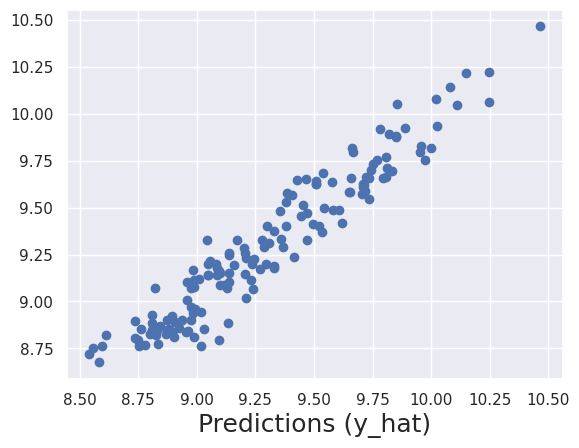

In [31]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.xlabel('Predictions (y_hat)', size=18)
plt.show()

<ipython-input-32-7d58f396fbc6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

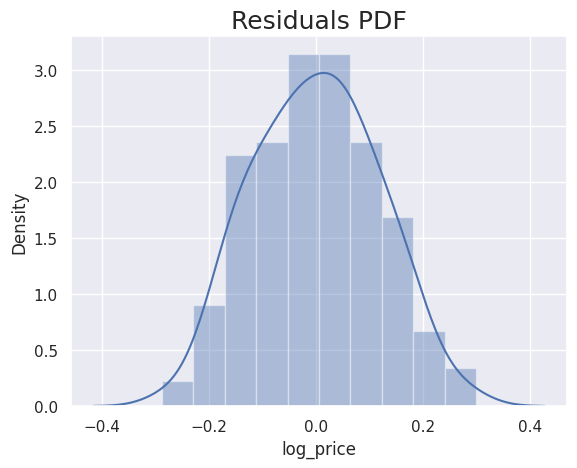

In [32]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [33]:
reg.score(x_train, y_train)

0.9199922061777608

In [34]:
reg.intercept_

9.30021552890477

In [35]:
reg.coef_

array([-0.05614153,  0.02415517,  0.05389268,  0.01148444,  0.06796426,
       -0.00580249,  0.16452433, -0.07801698,  0.03433727,  0.14721136,
        0.10107085,  0.00385028, -0.11738422,  0.07912993,  0.04542204,
        0.02540583, -0.00709831, -0.06463968, -0.14828636, -0.14240236,
       -0.12171923, -0.05060183, -0.00035828, -0.02477936,  0.06493578,
        0.0105747 , -0.02355409, -0.03130519, -0.0900321 , -0.17457742,
       -0.06515118, -0.03130519, -0.00223445, -0.00302954, -0.04542204,
       -0.00580473,  0.04390515, -0.01082257, -0.00838274])

In [36]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,car_ID,-0.056142
1,symboling,0.024155
2,wheelbase,0.053893
3,carlength,0.011484
4,carwidth,0.067964
5,carheight,-0.005802
6,curbweight,0.164524
7,enginesize,-0.078017
8,boreratio,0.034337
9,compressionratio,0.147211


In [37]:
y_hat_test = reg.predict(x_test)

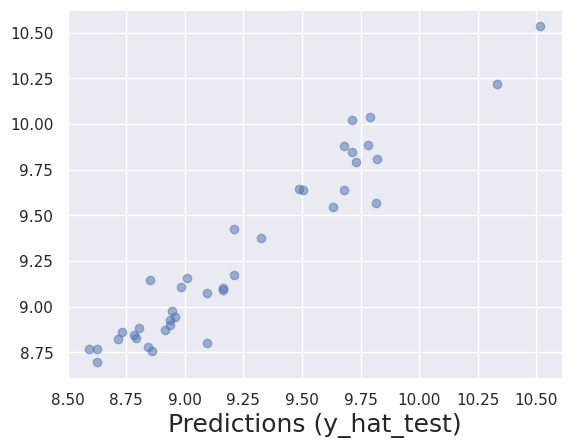

In [38]:
plt.scatter(y_test, y_hat_test, alpha=0.5)
plt.xlabel('Targets (y_test)', size=18)
plt.xlabel('Predictions (y_hat_test)', size=18)
plt.show()

In [39]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,8859.738273
1,9359.953388
2,19651.733714
3,6443.444217
4,14264.785045


In [40]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,8859.738273,9538.0
1,9359.953388,6989.0
2,19651.733714,17669.0
3,6443.444217,5389.0
4,14264.785045,18344.0


In [41]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Prediction']

In [42]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals'] / df_pf['Target'] * 100)
df_pf.head()

,Prediction,Target,Residuals,Difference%
0,8859.738273,9538.0,678.261727,7.111153
1,9359.953388,6989.0,-2370.953388,33.924072
2,19651.733714,17669.0,-1982.733714,11.221539
3,6443.444217,5389.0,-1054.444217,19.566603
4,14264.785045,18344.0,4079.214955,22.237325
